<a href="https://colab.research.google.com/github/Rydzio/Machine-Learning/blob/main/Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
data = '/content/gdrive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 6 - Reinforcement Learning/Section 33 - Thompson Sampling/Python/Ads_CTR_Optimisation.csv'
dataset = pd.read_csv(data)

## Implementing Thompson Sampling

In [ ]:
N = 500
d = 10
ads_selected = []
numbers_of_rewards_0 = [0] * d
numbers_of_rewards_1 = [0] * d
total_reward = 0

In [ ]:
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if (reward == 1):
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

## Visualising the results - Histogram

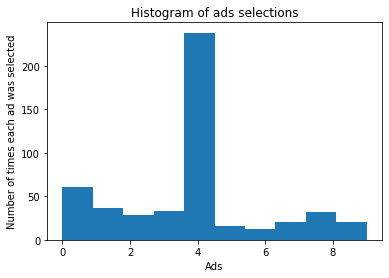

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()